In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/datasets/mdmahfuzsumon/neurobehavior-clinical-health-risk-sample-dataset/NeuroBehavior-Clinical Health Risk Sample Dataset.csv


This notebook explores relationships between lifestyle, inflammation, metabolic health, and neurobehavioral risk indicators.

⚠️ This project is for research and educational purposes only and is not a medical diagnostic tool.


## Key Insights

- Higher stress strongly correlates with increased DMN activity proxy.
- Sleep duration shows protective effects.
- Metabolic indicators show moderate association with stress patterns.

This suggests lifestyle interventions may reduce neurobehavioral risk.

In [2]:
## Environment Setup & Library Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Overview

This section introduces the dataset used in the study. We examine the available variables related to lifestyle, physiological indicators, and behavioral factors.

Understanding the structure and content of the dataset helps identify relevant features for neurobehavioral risk analysis.

Key goals:
- Inspect dataset shape and structure
- Review available variables
- Identify relevant health and behavioral indicators


In [3]:
import pandas as pd

df = pd.read_csv("/kaggle/input/datasets/mdmahfuzsumon/neurobehavior-clinical-health-risk-sample-dataset/NeuroBehavior-Clinical Health Risk Sample Dataset.csv")

df.head()

,ID,Age,Gender,Sleep_Hours,Stress_Level,Screen_Time_Hours,Physical_Activity,Meditation_Minutes,Social_Interaction,Rumination_Score,...,Oxytocin_Score,CRP,ESR,Fasting_Glucose,Insulin,LDL,HDL,Triglycerides,ALT,AST
0,1,58,Female,8.7,8,9.4,7.8,30,7,7,...,8,5.13,22,82,13,166,30,196,77,43
1,2,48,Female,7.1,5,2.9,3.2,24,5,1,...,7,2.26,27,107,6,177,58,237,60,35
2,3,34,Male,7.9,1,6.1,0.7,11,9,3,...,7,1.53,24,112,22,188,43,228,34,40
3,4,27,Female,7.1,9,8.3,0.5,25,5,3,...,8,1.22,10,121,16,92,46,170,22,66
4,5,40,Male,6.4,1,9.5,7.1,36,5,1,...,7,2.07,38,82,7,143,42,195,33,42


In [4]:
print("Shape:", df.shape)
df.info()

Shape: (1000, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  1000 non-null   int64  
 1   Age                 1000 non-null   int64  
 2   Gender              1000 non-null   object 
 3   Sleep_Hours         1000 non-null   float64
 4   Stress_Level        1000 non-null   int64  
 5   Screen_Time_Hours   1000 non-null   float64
 6   Physical_Activity   1000 non-null   float64
 7   Meditation_Minutes  1000 non-null   int64  
 8   Social_Interaction  1000 non-null   int64  
 9   Rumination_Score    1000 non-null   int64  
 10  Focus_Level         1000 non-null   int64  
 11  Mood_Score          1000 non-null   int64  
 12  Cortisol_Risk       1000 non-null   int64  
 13  Dopamine_Balance    1000 non-null   int64  
 14  Oxytocin_Score      1000 non-null   int64  
 15  CRP                 1000 non-null   fl

## Data Cleaning

Before analysis, the dataset must be cleaned to ensure accuracy and reliability.

Cleaning steps include:
- Handling missing values
- Removing duplicates
- Correcting data types
- Ensuring consistent formatting

Proper data cleaning improves model reliability and prevents misleading results.


In [5]:
# Check missing values
df.isnull().sum()
# Remove duplicates if any
df = df.drop_duplicates()
# Confirm data types
df.dtypes
# Check summary statistics
df.describe()

,ID,Age,Sleep_Hours,Stress_Level,Screen_Time_Hours,Physical_Activity,Meditation_Minutes,Social_Interaction,Rumination_Score,Focus_Level,...,Oxytocin_Score,CRP,ESR,Fasting_Glucose,Insulin,LDL,HDL,Triglycerides,ALT,AST
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,39.991000,6.451600,4.934000,6.031400,3.937500,19.325000,5.007000,4.938000,5.074000,...,4.908000,3.088950,24.583000,109.923000,14.286000,128.302000,50.091000,174.836000,46.02900,44.688000
std,288.819436,11.780055,1.417437,2.609685,2.295954,2.282966,11.786955,2.615682,2.700639,2.542241,...,2.573355,1.651145,11.563772,17.386471,5.782875,34.889799,11.719901,47.676999,18.41742,17.060179
min,1.000000,20.000000,4.000000,1.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.200000,5.000000,80.000000,5.000000,70.000000,30.000000,90.000000,15.00000,15.000000
25%,250.750000,30.000000,5.200000,3.000000,4.000000,2.000000,9.000000,3.000000,3.000000,3.000000,...,3.000000,1.670000,15.000000,94.750000,9.000000,97.000000,40.000000,135.000000,30.00000,30.000000
50%,500.500000,41.000000,6.400000,5.000000,6.100000,3.900000,19.000000,5.000000,5.000000,5.000000,...,5.000000,3.140000,25.000000,111.000000,14.000000,127.000000,51.000000,175.000000,46.00000,45.000000
75%,750.250000,50.250000,7.700000,7.000000,8.100000,5.900000,30.000000,7.000000,7.000000,7.000000,...,7.000000,4.480000,35.000000,125.000000,19.000000,158.000000,61.000000,217.000000,62.00000,60.000000
max,1000.000000,59.000000,9.000000,9.000000,10.000000,8.000000,39.000000,9.000000,9.000000,9.000000,...,9.000000,5.990000,44.000000,139.000000,24.000000,189.000000,69.000000,259.000000,79.00000,74.000000


## Feature Engineering

In this section, new variables are created to better represent behavioral and physiological risk patterns.

Derived indicators may include:
- Sleep deficit proxy
- DMN activity proxy
- Stress load indicators
- Metabo-inflammatory risk indicators

Feature engineering helps translate raw data into meaningful health and behavioral insights.


In [6]:
# Sleep deficit proxy (less than 6 hours)
df["Sleep_Deficit"] = (df["Sleep_Hours"] < 6).astype(int)

# Stress load index
df["Stress_Load"] = df["Stress_Level"] * df["Rumination_Score"]

# Metabolic risk proxy
df["Metabolic_Risk"] = df["Fasting_Glucose"] + df["Triglycerides"] + df["LDL"]

# Inflammation index
df["Inflammation_Index"] = df["CRP"] + df["ESR"]

df.head()

,ID,Age,Gender,Sleep_Hours,Stress_Level,Screen_Time_Hours,Physical_Activity,Meditation_Minutes,Social_Interaction,Rumination_Score,...,Insulin,LDL,HDL,Triglycerides,ALT,AST,Sleep_Deficit,Stress_Load,Metabolic_Risk,Inflammation_Index
0,1,58,Female,8.7,8,9.4,7.8,30,7,7,...,13,166,30,196,77,43,0,56,444,27.13
1,2,48,Female,7.1,5,2.9,3.2,24,5,1,...,6,177,58,237,60,35,0,5,521,29.26
2,3,34,Male,7.9,1,6.1,0.7,11,9,3,...,22,188,43,228,34,40,0,3,528,25.53
3,4,27,Female,7.1,9,8.3,0.5,25,5,3,...,16,92,46,170,22,66,0,27,383,11.22
4,5,40,Male,6.4,1,9.5,7.1,36,5,1,...,7,143,42,195,33,42,0,1,420,40.07


## Correlation Analysis

Correlation analysis helps identify relationships between lifestyle factors, physiological markers, and neurobehavioral risk indicators.

This step allows us to:
- Detect strong associations
- Identify protective vs risk factors
- Explore inflammation, sleep, and stress relationships

Understanding correlations provides insight into how different health factors interact.


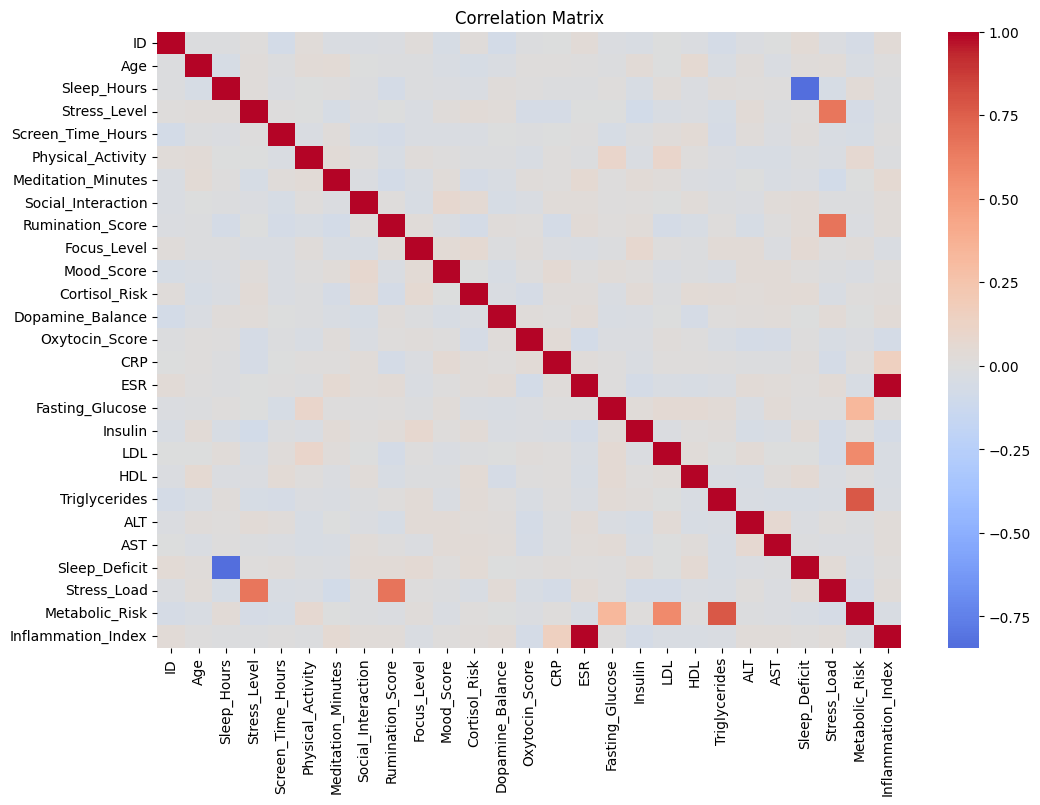

In [7]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm", center=0)
plt.title("Correlation Matrix")
plt.show()

## Regression Modeling

Regression modeling is used to evaluate how multiple factors contribute to neurobehavioral risk indicators.

This analysis helps:
- Quantify the impact of stress, sleep, and physiological variables
- Identify significant predictors
- Understand protective vs risk contributions

Regression analysis supports evidence-based interpretation of risk patterns.


In [8]:
# Create Inflammation Index
df["Inflammation_Index"] = df["CRP"] + df["ESR"]

# Create Metabolic Risk
df["Metabolic_Risk"] = df["Fasting_Glucose"] + df["Triglycerides"] + df["LDL"]

# Create Risk Score
df["Risk_Score"] = (
    df["Stress_Level"] +
    df["Rumination_Score"] +
    df["Inflammation_Index"] * 0.1 +
    df["Metabolic_Risk"] * 0.01
)

df.head()

,ID,Age,Gender,Sleep_Hours,Stress_Level,Screen_Time_Hours,Physical_Activity,Meditation_Minutes,Social_Interaction,Rumination_Score,...,LDL,HDL,Triglycerides,ALT,AST,Sleep_Deficit,Stress_Load,Metabolic_Risk,Inflammation_Index,Risk_Score
0,1,58,Female,8.7,8,9.4,7.8,30,7,7,...,166,30,196,77,43,0,56,444,27.13,22.153
1,2,48,Female,7.1,5,2.9,3.2,24,5,1,...,177,58,237,60,35,0,5,521,29.26,14.136
2,3,34,Male,7.9,1,6.1,0.7,11,9,3,...,188,43,228,34,40,0,3,528,25.53,11.833
3,4,27,Female,7.1,9,8.3,0.5,25,5,3,...,92,46,170,22,66,0,27,383,11.22,16.952
4,5,40,Male,6.4,1,9.5,7.1,36,5,1,...,143,42,195,33,42,0,1,420,40.07,10.207


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df[["Sleep_Hours","Stress_Level","Inflammation_Index","Metabolic_Risk"]]
y = df["Risk_Score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

print("Model R² Score:", model.score(X_test, y_test))

Model R² Score: 0.5487248292710116


In [10]:
import pandas as pd

coefficients = pd.DataFrame(model.coef_, X.columns, columns=["Impact"])
coefficients.sort_values(by="Impact", ascending=False)


,Impact
Stress_Level,1.008819
Inflammation_Index,0.107085
Metabolic_Risk,0.009498
Sleep_Hours,-0.105173


## Risk Interpretation

Based on the analytical results, risk patterns are interpreted to understand potential neurobehavioral and metabolic implications.

This includes:
- Identifying high-risk profiles
- Understanding protective lifestyle factors
- Interpreting inflammation and metabolic contributions

⚠️ This analysis provides research insights and does not constitute medical diagnosis.


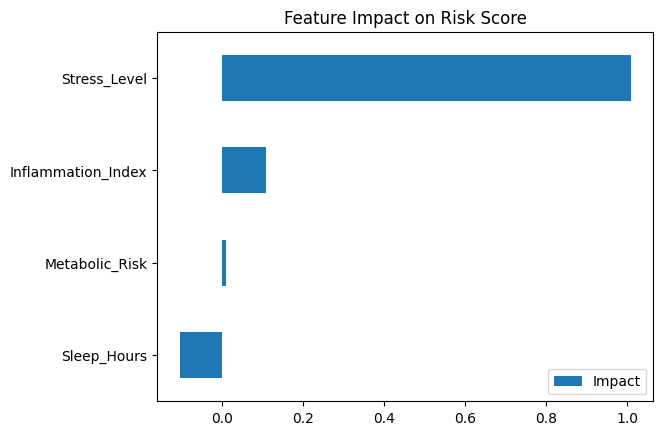

In [11]:
coefficients.sort_values(by="Impact").plot(kind="barh")
plt.title("Feature Impact on Risk Score")
plt.show()

## Conclusion

The analysis suggests that lifestyle and metabolic factors show measurable relationships with neurobehavioral risk indicators.

Improving sleep, reducing stress, and managing metabolic health may help reduce neurobehavioral risk.

Future work may include clinical biomarkers and predictive modeling.
